# Importing the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

true = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

In [2]:
true.drop(columns = ['subject','date'], inplace = True)
fake.drop(columns = ['subject','date'], inplace = True)

In [3]:
true_copy = true.copy()
fake_copy = fake.copy()

# Removing Getty

In [4]:
stop_words =['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
true_copy['text'] = true_copy['text'].str.replace(pat, '')

stop_words =['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
fake_copy['text'] = fake_copy['text'].str.replace(pat, '')

# Feature Engineering

In [5]:
true_copy['title_length_char'] = true_copy.title.str.len()
fake_copy['title_length_char'] = fake_copy.title.str.len()

In [6]:
true_copy['title_Upper'] = true_copy['title'].str.count(r'[A-Z]')

fake_copy['title_Upper'] = fake_copy['title'].str.count(r'[A-Z]')

In [7]:
true_copy['title_lower_ratio'] = true_copy.title_Upper / true_copy.title_length_char
true_copy.drop(columns = 'title_Upper', inplace = True)




In [8]:
fake_copy['title_lower_ratio'] = fake_copy.title_Upper / fake_copy.title_length_char
fake_copy.drop(columns = 'title_Upper', inplace = True)

# Setting the target

In [9]:
true_copy['score'] = 1
fake_copy['score'] = 0

In [10]:
data = pd.concat([true_copy, fake_copy], ignore_index=True)

# Creating text + title

In [11]:
data['title_text'] = data['title'] + data['text']

In [12]:
data.drop(columns = ['title','text'], inplace = True)

In [13]:
data.head()

,title_length_char,title_lower_ratio,score,title_text
0,64,0.062500,1,"As U.S. budget fight looms, Republicans flip t..."
1,64,0.062500,1,U.S. military to accept transgender recruits o...
2,60,0.116667,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,59,0.135593,1,FBI Russia probe helped by Australian diplomat...
4,69,0.057971,1,Trump wants Postal Service to charge 'much mor...


# Preprocessing

In [14]:
def lower_case(text):
    text = text.lower()
    return text
data['title_text'] = data['title_text'].map(lower_case)



In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['title_text'] = data['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



In [16]:
import string
punc = string.punctuation + '“' + '”' + '’' + '‘'
def remove_punctuation(text):
    for punctuation in punc:
        text = text.replace(punctuation, '')
    return text


data['title_text'] = data['title_text'].apply(remove_punctuation)



In [17]:
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text
data['title_text'] = data['title_text'].map(remove_numbers)



In [18]:
data.head()

,title_length_char,title_lower_ratio,score,title_text
0,64,0.062500,1,us budget fight looms republicans flip fiscal ...
1,64,0.062500,1,us military accept transgender recruits monday...
2,60,0.116667,1,senior us republican senator let mr mueller jo...
3,59,0.135593,1,fbi russia probe helped australian diplomat ti...
4,69,0.057971,1,trump wants postal service charge much more am...


In [19]:
data = data[['title_text', 'title_length_char', 'title_lower_ratio', 'score']]
data.head()

,title_text,title_length_char,title_lower_ratio,score
0,us budget fight looms republicans flip fiscal ...,64,0.062500,1
1,us military accept transgender recruits monday...,64,0.062500,1
2,senior us republican senator let mr mueller jo...,60,0.116667,1
3,fbi russia probe helped australian diplomat ti...,59,0.135593,1
4,trump wants postal service charge much more am...,69,0.057971,1


In [20]:
#from sklearn.feature_extraction.text import HashingVectorizer
#corpus = data['title_text']
#vectorizer = HashingVectorizer(n_features=2**4)
#X = vectorizer.fit_transform(corpus)
#print(X.shape)

In [51]:
pip install wordcloud

     |████████████████████████████████| 220 kB 2.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_15_x86_64.whl size=158612 sha256=81d7ee99d159e541f2a832792c0a45006d6f7dd6bd3844223e5e4cbd33235e8f
  Stored in directory: /Users/nicolo/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
You should consider upgrading via the '/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

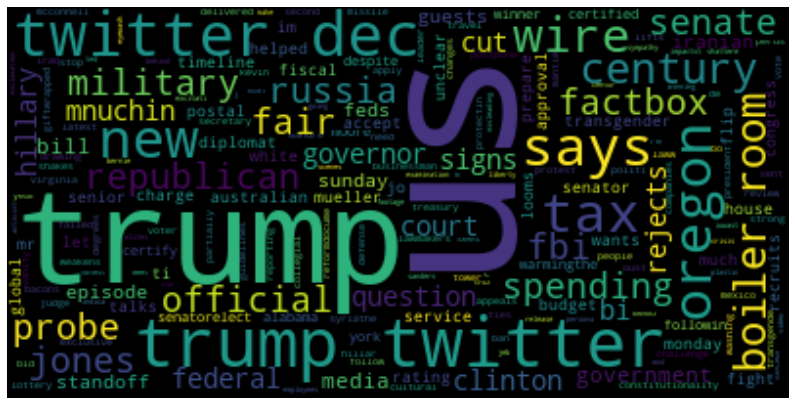

In [61]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

text = data['title_text']

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white")
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Tokenizer

In [ ]:
#from nltk.tokenize import word_tokenize
#def tokenize(text):
    #token= word_tokenize(text)
    #return token
#data['title_text'] = data['title_text'].apply(tokenize)

# Lemmatizer

In [21]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

data['title_text'].apply(lemmatize_text)

0        [u, s,  , b, u, d, g, e, t,  , f, i, g, h, t, ...
1        [u, s,  , m, i, l, i, t, a, r, y,  , a, c, c, ...
2        [s, e, n, i, o, r,  , u, s,  , r, e, p, u, b, ...
3        [f, b, i,  , r, u, s, s, i, a,  , p, r, o, b, ...
4        [t, r, u, m, p,  , w, a, n, t, s,  , p, o, s, ...
5        [w, h, i, t, e,  , h, o, u, s, e,  , c, o, n, ...
6        [t, r, u, m, p,  , s, a, y, s,  , r, u, s, s, ...
7        [f, a, c, t, b, o, x,  , t, r, u, m, p,  , t, ...
8        [t, r, u, m, p,  , t, w, i, t, t, e, r,  , d, ...
9        [a, l, a, b, a, m, a,  , o, f, f, i, c, i, a, ...
10       [j, o, n, e, s,  , c, e, r, t, i, f, i, e, d, ...
11       [n, e, w,  , y, o, r, k,  , g, o, v, e, r, n, ...
12       [f, a, c, t, b, o, x,  , t, r, u, m, p,  , t, ...
13       [t, r, u, m, p,  , t, w, i, t, t, e, r,  , d, ...
14       [m, a, n,  , s, a, y, s,  , d, e, l, i, v, e, ...
15       [v, i, r, g, i, n, i, a,  , o, f, f, i, c, i, ...
16       [u, s,  , l, a, w, m, a, k, e, r, s,  , q, u, .

# X and Y


In [22]:
x = data.drop(columns = 'score', axis=1)
y = data['score']

# Splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [62]:
x_train

,title_text,title_length_char,title_lower_ratio
33958,breaking finally new wikileaks email…we going ...,86,0.220930
19813,german liberals would expect finance ministry ...,65,0.030769
25814,trump loses it complete nervous breakdown wors...,82,0.317073
18689,merkel macron pledge lead eu forward postbrexi...,52,0.096154
44673,american tragedy really killed jonbenét ramsey...,55,0.418182
22749,portal hell internet loses mysterious red ligh...,99,0.161616
2628,man whose firm behind trump dossier testify se...,71,0.042254
10117,biden ukraines poroshenko meet thursday white ...,57,0.105263
4388,us strikes syria show resolve chemical attacks...,70,0.085714
16056,tunnel collapse may killed north korea nuclea...,88,0.045455


# Initializing the model

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import SVC

preprocessor = ColumnTransformer([
    ('vectorizer_title_text', HashingVectorizer(), 'title_text'),
    ('MinMaxScaler', MinMaxScaler(), ['title_length_char'])
])
final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('sgdc', SGDClassifier())])



In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'sgdc__penalty' : ('l2', 'l1'),
    'sgdc__loss' : ('log', 'hinge')}
grid_search = GridSearchCV(final_pipe,
                           parameters,
                           scoring = ["f1", "accuracy", "recall", "precision"],
                           refit= "accuracy",
                           cv=5,
                           verbose = 1)

In [29]:
import time

start = time.time()
grid_search.fit(x_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_mod

Training time: 462.9363851547241s


In [30]:
tuned_pipe = grid_search.best_estimator_

In [31]:
tuned_pipe

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('vectorizer_title_text', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'nump...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [32]:
grid_search.best_params_

{'sgdc__loss': 'hinge', 'sgdc__penalty': 'l2'}

In [33]:
grid_search.score(x_test,y_test)

0.9939866369710467

In [34]:
pd.DataFrame(grid_search.cv_results_)

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  war

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdc__loss,param_sgdc__penalty,params,split0_test_f1,split1_test_f1,split2_test_f1,...,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,3.926837,0.092422,3.737647,0.083047,log,l2,"{'sgdc__loss': 'log', 'sgdc__penalty': 'l2'}",0.988693,0.985199,0.988388,...,0.984313,0.001927,4,0.986023,0.986105,0.985450,0.986913,0.987648,0.986428,0.000768
1,4.062368,0.014106,3.712832,0.070152,log,l1,"{'sgdc__loss': 'log', 'sgdc__penalty': 'l1'}",0.988529,0.985144,0.989179,...,0.987272,0.001284,3,0.987515,0.987202,0.987676,0.989065,0.988836,0.988059,0.000748
2,3.931110,0.137298,3.905998,0.229591,hinge,l2,"{'sgdc__loss': 'hinge', 'sgdc__penalty': 'l2'}",0.995341,0.993505,0.995010,...,0.992504,0.002166,1,0.996177,0.995762,0.995847,0.995681,0.995435,0.995780,0.000241
3,4.052777,0.058460,3.777196,0.144176,hinge,l1,"{'sgdc__loss': 'hinge', 'sgdc__penalty': 'l1'}",0.991012,0.988314,0.991832,...,0.990670,0.001414,2,0.991513,0.991174,0.991249,0.991586,0.992663,0.991637,0.000536


In [42]:
results = pd.DataFrame(grid_search.cv_results_)
results[2]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdc__loss,param_sgdc__penalty,params,split0_test_f1,split1_test_f1,split2_test_f1,...,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
2,3.93111,0.137298,3.905998,0.229591,hinge,l2,"{'sgdc__loss': 'hinge', 'sgdc__penalty': 'l2'}",0.995341,0.993505,0.99501,...,0.992504,0.002166,1,0.996177,0.995762,0.995847,0.995681,0.995435,0.99578,0.000241


# Testing the model on some new data

In [63]:
import trafilatura
downloaded = trafilatura.fetch_url('https://www.bbc.com/news/election-us-2020-55025997')
text_test = trafilatura.extract(downloaded)

In [100]:
title_test='Trump options narrow as Michigan backs Biden win'

In [111]:
title_test.count(r'[A-Z]')

0

# Creating a function that cleans the test

In [103]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

title_test = [w for w in title_test if not w in stop_words]
text_test = [w for w in text_test if not w in stop_words]


In [107]:
import string
punc = string.punctuation + '“' + '”' + '’' + '‘'
def remove_punctuation(text):
    for punctuation in punc:
        text = text.replace(punctuation, '')
    return text



['T',
 'r',
 'u',
 'p',
 ' ',
 'p',
 'n',
 ' ',
 'n',
 'r',
 'r',
 'w',
 ' ',
 ' ',
 'M',
 'c',
 'h',
 'g',
 'n',
 ' ',
 'b',
 'c',
 'k',
 ' ',
 'B',
 'e',
 'n',
 ' ',
 'w',
 'n']

In [108]:
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text


text_test = ''.join(word for word in text_test if not word.isdigit())
title_test = ''.join(word for word in text_test if not word.isdigit())




In [109]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

text_test = lemmatize_text(text_test)
title_test = lemmatize_text(title_test)



In [110]:
test_series=pd.Series(text_test)
title_series=pd.Series(title_test)


In [ ]:
test_df=pd.DataFrame({'title_clean':title_test,'text_clean':text_test, 'title_length_char': 46, 'title_lower_ratio':)})

# Creating functions for the cleaning on the test

In [79]:
len(title_clean)



46

In [81]:
title_clean.count(r'[A-Z]')

0

In [ ]:
title_lower_ratio = 0/ true_copy.title_length_char

# Transforming the data for the test

In [ ]:
test_series=pd.Series(text_clean)
title_series=pd.Series(title_clean)

In [113]:
test_df=pd.DataFrame({'title_clean':title_series,'text_clean':test_series,'title_len_char': 46,'title_lower_ratio' : 0.065217 })

In [114]:
test_df

,title_clean,text_clean,title_len_char,title_lower_ratio
0,T,T,46,0.065217
1,r,r,46,0.065217
2,u,u,46,0.065217
3,p,p,46,0.065217
4,,,46,0.065217
5,p,p,46,0.065217
6,n,n,46,0.065217
7,,,46,0.065217
8,n,n,46,0.065217
9,r,r,46,0.065217


In [117]:
test_df['title_text'] = test_df['title_clean'] + test_df['text_clean']

In [119]:
test_df.drop(columns = ['title_clean','text_clean'], inplace = True)

In [122]:
test_df = test_df[['title_text', 'title_len_char', 'title_lower_ratio',]]

In [123]:
test_df

,title_text,title_len_char,title_lower_ratio
0,TT,46,0.065217
1,rr,46,0.065217
2,uu,46,0.065217
3,pp,46,0.065217
4,,46,0.065217
5,pp,46,0.065217
6,nn,46,0.065217
7,,46,0.065217
8,nn,46,0.065217
9,rr,46,0.065217


In [124]:
tuned_pipe.predict(test_df)

ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword